# Tratamento, Limpeza e Análise de Dados: Revelando Insights

Dataset utilizado: Airbnb Open Data
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?resource=download

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Importando e visualizando o dataset

In [62]:
pd.set_option('display.max_columns', None)

columns = ['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules']

df = pd.read_csv("Airbnb_Open_Data.csv", usecols = columns)


In [63]:
df.head(5)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [64]:
df.dtypes

NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                       

In [65]:
len(df)

102599

In [70]:
df.describe()

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


#### Cálculo de "missing values" (valores nulos) - NaN

In [69]:
per_df = df.isnull().sum()/df.shape[0] * 100
per_df = pd.DataFrame({"colunas": per_df.keys(), "missing values %": per_df.round(2), "data type": df.dtypes})
per_df.reset_index(drop=True, inplace=True)
per_df = per_df.sort_values(by='missing values %',ascending=False)
per_df


,colunas,missing values %,data type
23,house_rules,50.81,object
18,last review,15.49,object
19,reviews per month,15.48,float64
8,country,0.52,object
22,availability 365,0.44,float64
3,host name,0.40,object
16,minimum nights,0.40,float64
20,review rate number,0.32,float64
21,calculated host listings count,0.31,float64
2,host_identity_verified,0.28,object


## Tratamento e limpeza dos dados

#### Trata preços

In [71]:
def trata_preços(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$", "").replace(",", "").replace(" ", ""))

In [72]:
df["price"] = df["price"].apply(lambda x: trata_preços(x))
df["service fee"] = df["service fee"].apply(lambda x: trata_preços(x))

#### Trata nulos

In [73]:
def trata_NaN_values(df, column_name):
    # Substituir NaN por 0 e converter para inteiro
    df[column_name] = np.array(df[column_name].fillna(0), dtype=np.int16)
    return df

In [75]:
df = trata_NaN_values(df,'reviews per month')
df = trata_NaN_values(df,'availability 365')
df = trata_NaN_values(df,'minimum nights')
df = trata_NaN_values(df,'number of reviews')
df

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10,9,10/19/2021,0,4.0,6.0,286,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30,45,5/21/2022,0,4.0,2.0,228,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3,0,NaN,0,5.0,1.0,352,"I encourage you to use my kitchen, cooking and..."
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30,270,7/5/2019,4,4.0,1.0,322,NaN
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10,9,11/19/2018,0,3.0,1.0,289,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,844.0,169.0,1,0,NaN,0,3.0,1.0,227,No Smoking No Parties or Events of any kind Pl...
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,837.0,167.0,1,1,7/6/2015,0,2.0,2.0,395,House rules: Guests agree to the following ter...
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,988.0,198.0,3,0,NaN,0,5.0,1.0,342,NaN
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,546.0,109.0,2,5,10/11/2015,0,3.0,1.0,386,NaN


#### Trata datas

In [85]:
def trata_datas(df, column_name, new_column_name):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
    
    def formato_safra(data):
        if pd.notnull(data):
            return data.strftime('%y%m')
        else:
            return None
    df[new_column_name] = df[column_name].apply(formato_safra)
    
    return df

In [86]:
df = trata_datas(df, 'last review', 'last review safra')
df

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,last review safra
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10,9,2021-10-19,0,4.0,6.0,286,Clean up and treat the home the way you'd like...,2110
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30,45,2022-05-21,0,4.0,2.0,228,Pet friendly but please confirm with me if the...,2205
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3,0,NaT,0,5.0,1.0,352,"I encourage you to use my kitchen, cooking and...",None
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30,270,2019-07-05,4,4.0,1.0,322,NaN,1907
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10,9,2018-11-19,0,3.0,1.0,289,"Please no smoking in the house, porch or on th...",1811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,844.0,169.0,1,0,NaT,0,3.0,1.0,227,No Smoking No Parties or Events of any kind Pl...,None
102595,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,837.0,167.0,1,1,2015-07-06,0,2.0,2.0,395,House rules: Guests agree to the following ter...,1507
102596,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,988.0,198.0,3,0,NaT,0,5.0,1.0,342,NaN,None
102597,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,546.0,109.0,2,5,2015-10-11,0,3.0,1.0,386,NaN,1510


## Extração dos dados

#### Extração de .csv por safra

In [90]:
def divide_e_salva_por_safra(df, coluna_safra,valor_safra):
    df_temp = df[df[coluna_safra] == valor_safra]
    nome_arquivo = f'{coluna_safra}_{valor_safra}.csv'
    df_temp.to_csv(nome_arquivo, index=False)
    print(f'Dados salvos em {nome_arquivo}')
    return df_temp

In [91]:
df_oct_21 = divide_e_salva_por_safra(df, 'last review safra', '2110')
df_oct_21

Dados salvos em last review safra_2110.csv


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,last review safra
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10,9,2021-10-19,0,4.0,6.0,286,Clean up and treat the home the way you'd like...,2110
62783,Creative Director's Chinatown Loft,74591413544,verified,Todd,Manhattan,Chinatown,40.71502,-73.99170,United States,US,True,flexible,Entire home/apt,2008.0,379.0,76.0,14,19,2021-10-31,0,5.0,1.0,213,NaN,2110
62784,"Convenient East Village Studio,",56004838653,verified,Leigh,Manhattan,East Village,40.72989,-73.97988,United States,US,True,moderate,Entire home/apt,2009.0,960.0,192.0,30,167,2021-10-31,1,2.0,1.0,45,NaN,2110
62785,Central Harlem Clean Furnished Room (Near Apollo),59435762062,verified,Anthony,Manhattan,Harlem,40.81213,-73.95380,United States,US,False,moderate,Private room,2013.0,1117.0,223.0,30,26,2021-10-31,0,3.0,1.0,101,NaN,2110
62786,Furnished 1 Bedroom in East Harlem,51552178229,unconfirmed,Jeremiah,Manhattan,East Harlem,40.79292,-73.93953,United States,US,True,moderate,Entire home/apt,2015.0,679.0,136.0,30,41,2021-10-31,0,3.0,1.0,8,NaN,2110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63547,Entire Apartment: Clean & Cozy 1 BR,89633259530,unconfirmed,Kwam,Brooklyn,Bushwick,40.70550,-73.91841,United States,US,True,flexible,Entire home/apt,2008.0,480.0,96.0,30,1,2021-10-01,0,4.0,1.0,277,NaN,2110
63548,Bedroom in luxury upper west side apartment,83396261986,verified,Maegan,Manhattan,Upper West Side,40.80203,-73.96501,United States,US,False,flexible,Private room,2018.0,67.0,13.0,25,1,2021-10-01,0,5.0,3.0,0,NaN,2110
63549,Brand new private rooms looking for new habita...,67790331986,unconfirmed,NaN,Manhattan,Harlem,40.81983,-73.93989,United States,US,False,flexible,Private room,2021.0,127.0,25.0,30,1,2021-10-01,0,2.0,45.0,58,NaN,2110
63550,1- bedroom in a 3 bedroom apartment 1 share bath,32413916079,unconfirmed,Daniel,Brooklyn,Bushwick,40.69029,-73.91532,United States,US,True,strict,Shared room,2013.0,675.0,135.0,3,1,2021-10-01,0,4.0,2.0,365,NaN,2110


In [92]:
df_oct_20 = divide_e_salva_por_safra(df, 'last review safra', '2010')
df_oct_20

Dados salvos em last review safra_2010.csv


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,last review safra
66547,Monthly discount - 2 bedroom upper east side,38335783575,verified,D,Manhattan,Upper East Side,40.77031,-73.95098,United States,US,False,strict,Entire home/apt,2014.0,605.0,121.0,30,2,2020-10-31,0,2.0,3.0,185,NaN,2010
66548,"Private Suite, Free Metrocard*",77855762275,unconfirmed,Christina,Queens,Flushing,40.75046,-73.80969,United States,US,False,moderate,Private room,2014.0,805.0,161.0,2,352,2020-10-31,3,2.0,2.0,137,NaN,2010
66549,Studio w/CV: Cleaning CDC guidelines implemented,92881530321,unconfirmed,Vida,Brooklyn,Greenpoint,40.72690,-73.94198,United States,US,True,strict,Entire home/apt,2015.0,265.0,53.0,30,8,2020-10-31,0,5.0,28.0,277,NaN,2010
66550,Spacious and sunny private room,51706249711,unconfirmed,Diego,Queens,Ridgewood,40.70835,-73.91158,United States,US,True,strict,Private room,2013.0,531.0,106.0,30,56,2020-10-31,0,3.0,3.0,264,NaN,2010
66551,Cozy apt convenient to everything!,18114417251,unconfirmed,Ruby,Manhattan,East Village,40.72556,-73.99036,United States,US,True,strict,Entire home/apt,2008.0,261.0,52.0,30,11,2020-10-31,0,5.0,1.0,173,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66723,"Modern Twin Room | Free GYM, coworking",10611509245,verified,SharedEasy Coliving,Brooklyn,Bedford-Stuyvesant,40.68175,-73.94466,United States,US,True,moderate,Shared room,2011.0,517.0,103.0,30,1,2020-10-01,0,4.0,8.0,288,NaN,2010
66724,Peace & Solace in Prospect Park South,23241702433,unconfirmed,Lucky,Brooklyn,Flatbush,40.65126,-73.96095,United States,US,True,strict,Private room,2014.0,84.0,17.0,30,2,2020-10-01,0,2.0,2.0,88,NaN,2010
66725,Popular Room NEW Apartment Williamsburg 2020,57636639965,unconfirmed,Shogo,Brooklyn,Williamsburg,40.70330,-73.94197,United States,US,False,moderate,Private room,2019.0,462.0,92.0,30,1,2020-10-01,0,5.0,125.0,60,NaN,2010
66726,2 Bedrooms - Great Location in NYC,86793381748,unconfirmed,Louise,Queens,Astoria,40.76548,-73.91833,United States,US,True,moderate,Entire home/apt,2007.0,815.0,163.0,30,2,2020-10-01,0,2.0,2.0,0,NaN,2010


## Análise de dados

#### Comparação de preço  médio por safras

In [ ]:
safra = ['10-2021', '10-2020']
preco_medio = [df_oct_21['price'].mean().round(1), df_oct_20['price'].mean().round(1)]


##### Comparação em tabelas

In [107]:
df_precos_medios = pd.DataFrame({
    'Safra': safra,
    'Preço Médio': preco_medio
})
df_precos_medios

,Safra,Preço Médio
0,10-2021,606.5
1,10-2020,588.3


##### Comparação em gráficos

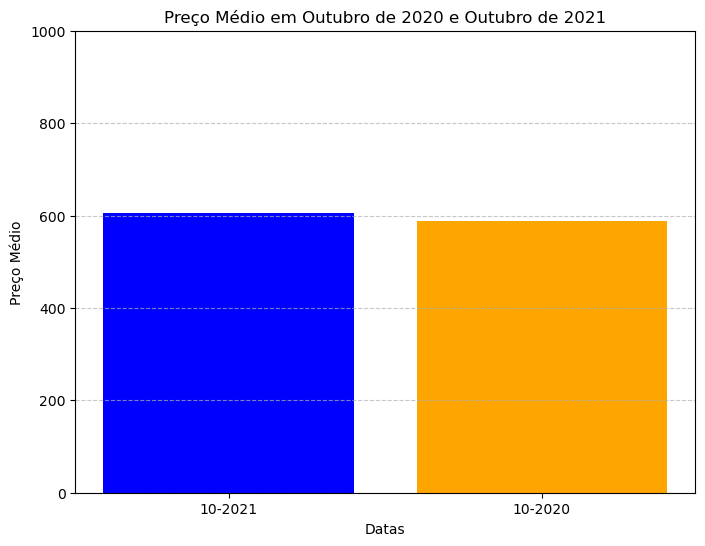

In [112]:
plt.figure(figsize=(8, 6))
plt.bar(safra, preco_medio, color=['blue', 'orange'])
plt.title('Preço Médio em Outubro de 2020 e Outubro de 2021')
plt.xlabel('Datas')
plt.ylabel('Preço Médio')
plt.ylim(0, 1000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Comparação de média de avaliações por safras

In [109]:
safra = ['10-2021', '10-2020']
media_avaliacoes = [df_oct_21['review rate number'].mean().round(1), df_oct_20['review rate number'].mean().round(1)]

##### Comparação em tabelas

In [104]:
df_media_reviews = pd.DataFrame({
    'Safra': safra,
    'Média Avaliações': media_avaliacoes
})
df_media_reviews

,Safra,Média Avaliações
0,10-2021,3.5
1,10-2020,3.5


##### Comparação em gráficos

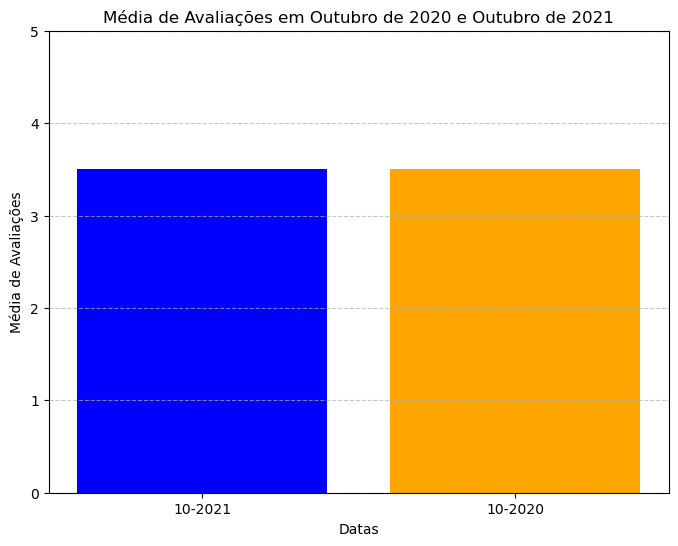

In [116]:
plt.figure(figsize=(8, 6))
plt.bar(safra, media_avaliacoes, color=['blue', 'orange'])
plt.title('Média de Avaliações em Outubro de 2020 e Outubro de 2021')
plt.xlabel('Datas')
plt.ylabel('Média de Avaliações')
plt.ylim(0, 5) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()